Name: Nazmus Sakib, Student_ID: 33361881, FIT5201 - S2 2023, Assignment 1, Section 1

#Section 1 - Model Complexity and Model Selection

##Question 1 [KNN Regressor]

1. Implement a KNN regressor using the scikit-learn conventations, i.e., in a class with the following skeleton.

from sklearn.base import BaseEstimator

class KnnRegressor(BaseEstimator):

    def __init__(self): # ADD PARAMETERS AS REQUIRED
      #YOUR CODE HERE

    def fit(self, x, y):
      #YOUR CODE HERE
      return self

    def predict(self, x):
      #YOUR CODE HERE

Hint: You can closely follow the implementation from Activity 1.1 of the KNN classifier. You cannot use sklearn.neighbors.KNeighborsRegressor to solve this task.
Note: Inheriting from BaseEstimator is not strictly required, but allows to use the implementation with utility functions like sklearn.model selection.cross validate.

In [12]:
# Import the libraries
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KDTree
from multiprocessing import Pool
import matplotlib.pyplot as plt

In [4]:
class KnnRegressor(BaseEstimator):
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self

    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            distances = np.sqrt(np.sum((self.X_train - X[i]) ** 2, axis=1))
            nearest_neighbors_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_neighbor_values = self.y_train[nearest_neighbors_indices]
            y_pred[i] = np.mean(nearest_neighbor_values)
        return y_pred

KNN is a machine learning algorithm used for regression tasks, which predicts numerical values. The class includes methods for training the model (fit) and making predictions (predict). It calculates distances between data points to find the nearest neighbors, then predicts the target values based on the average of the nearest neighbors' values. The number of neighbors considered in the prediction can be specified when creating an instance of the class.

The KnnRegressor class takes an optional parameter n_neighbors, which specifies the number of neighbors to consider (default is 5).

The fit method is used to store the training data X and corresponding target values y.

The predict method calculates the predicted values for the given input data X using K-nearest neighbors regression. It computes the distances between the input data points and the training data points, selects the n_neighbors nearest neighbors, and returns the average of their target values as the predicted output.

2. To test your implementation, load the datasets diabetes and california housing through
the functions load diabetes and fetch california housing, both of which are available
in the module sklearn.datasets. For both datasets, perform a training/test split (using a
fraction of 0.6 of the data as training data), fit your KNN regressor to the training portion
(using some guess for a good value of k), and report the training and test errors.


In [5]:
# Load datasets
diabetes_data = load_diabetes()
california_data = fetch_california_housing()

# Split datasets
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_data.data, diabetes_data.target, test_size=0.6, random_state=42)

california_X_train, california_X_test, california_y_train, california_y_test = train_test_split(
    california_data.data, california_data.target, test_size=0.6, random_state=42)

# Create and train KNN Regressor
knn_regressor = KnnRegressor(n_neighbors=5)  # Assuming n_neighbors=5, you can change this value
knn_regressor.fit(diabetes_X_train, diabetes_y_train)
diabetes_train_preds = knn_regressor.predict(diabetes_X_train)
diabetes_test_preds = knn_regressor.predict(diabetes_X_test)

knn_regressor.fit(california_X_train, california_y_train)
california_train_preds = knn_regressor.predict(california_X_train)
california_test_preds = knn_regressor.predict(california_X_test)

# Calculate Mean Squared Error
diabetes_train_error = mean_squared_error(diabetes_y_train, diabetes_train_preds)
diabetes_test_error = mean_squared_error(diabetes_y_test, diabetes_test_preds)

california_train_error = mean_squared_error(california_y_train, california_train_preds)
california_test_error = mean_squared_error(california_y_test, california_test_preds)

print(f"Diabetes Dataset:")
print(f"Train Error: {diabetes_train_error:.4f}")
print(f"Test Error: {diabetes_test_error:.4f}")

print(f"\nCalifornia Housing Dataset:")
print(f"Train Error: {california_train_error:.4f}")
print(f"Test Error: {california_test_error:.4f}")


Diabetes Dataset:
Train Error: 2874.0927
Test Error: 3917.9496

California Housing Dataset:
Train Error: 0.8172
Test Error: 1.2252


In the above code:

1. Loading Datasets:

    It loads two datasets - diabetes_data and california_data using functions load_diabetes() and fetch_california_housing() respectively. These datasets will be used for regression tasks.

2. Splitting Datasets:

    The code then uses train_test_split to split both datasets into training and testing sets. For both datasets, 60% of the data is allocated for testing (test_size=0.6).

3. Creating and Training KNN Regressor:

    a. It creates an instance of the KnnRegressor class with n_neighbors=5 and assigns it to knn_regressor.
    
    b. It then fits the KNN regressor on both the diabetes and california training data using knn_regressor.fit().

4. Making Predictions:

    After training, it uses the trained regressor to make predictions on both the training and testing data for both datasets.

5. Calculating Mean Squared Error (MSE):

    It calculates the Mean Squared Error (MSE) for both the training and testing predictions for both datasets. This measures the quality of the regression model's predictions.

6. Printing Results:

    Finally, it prints out the MSE for both datasets, differentiating between the training and testing errors.

The provided output displays the Mean Squared Error (MSE) values for the regression model applied to two different datasets: the Diabetes dataset and the California Housing dataset.

**Diabetes Dataset:**

**Train Error: 2874.0927**

This means that, on average, the squared difference between the actual and predicted values on the training set is approximately 2874.1. A higher value indicates a higher level of error.

**Test Error: 3917.9496**

This shows that, on average, the squared difference between the actual and predicted values on the testing set is approximately 3917.9. It's slightly higher than the training error, which is expected because the model has never seen the testing data before.

**California Housing Dataset:**

**Train Error: 0.8172**

In this case, the train error is much lower compared to the Diabetes dataset. The average squared difference between actual and predicted values on the training set is only 0.8172. This suggests that the model is performing very well on the training data.

**Test Error: 1.2252**

The test error is slightly higher than the training error, but still very low. This indicates that the model is able to generalize well to unseen data.

In summary, the model performs significantly better on the California Housing dataset compared to the Diabetes dataset.

##Question 2 [L-fold Cross Validation]

1. Implement a L-Fold Cross Validation (CV) scheme using the scikit-learn convention for data splitters, i.e., using the following skeleton. Note that this is usually referred to as K-fold cross-validation. We are simply using the symbol L here to differentiate the cross validation parameter from the number of neighbours in K-nearest neighbours.

Hint: As usual, there are many ways to implement the desired solution. For one of the ways, the function np.concatenate can be useful to build up the array if the train indices. Test your implementation for correctness by running a simple example like the following.

    for idx_train, idx_test in LFold(5).split(list(range(20))):
      print(idx_train, idx_test)

You cannot use sklearn.model selection.KFold to solve this task.

In [8]:
#L-fold Cross Validation function
class LFold:
    def __init__(self, n_splits=5):
        self.n_splits = n_splits

    def get_n_splits(self, X=None, y=None, groups=None):
        return self.n_splits

    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        indices = np.arange(n_samples)
        fold_size = n_samples // self.n_splits
        remainder = n_samples % self.n_splits

        current_idx = 0
        for fold_idx in range(self.n_splits):
            start = current_idx
            stop = start + fold_size
            if fold_idx < remainder:
                stop += 1
            test_idx = indices[start:stop]
            train_idx = np.concatenate([indices[:start], indices[stop:]])
            yield train_idx, test_idx
            current_idx = stop

In [9]:
# Test example
for idx_train, idx_test in LFold(5).split(list(range(20))):
    print(idx_train, idx_test)

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 3]
[ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19] [4 5 6 7]
[ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19] [ 8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19] [12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [16 17 18 19]


The LFold class takes an optional parameter n_splits to specify the number of folds (default is 5).

The n_splits method returns the number of splits (folds) used in the cross-validation.

The split method generates the train and test indices for each fold. It calculates the size of each fold and handles any remaining samples that do not evenly divide into folds.

The yield statement inside the loop returns the train and test indices for each fold.

2. For both datasets from Question 1, use your L-fold CV implementation to systematically test the effect of the KNN parameter K by testing all options from 1 to 50 and, for each K, instead of only performing a single training/test split run your L-Fold CV. For each K compute the mean and standard deviation of the mean squared error (training and test) across the L folds and report the K for which you found the best test performance (for both datasets). Hint: To avoid code duplication and name clashes, consider creating a function or class that, given some generic input dataset, encapsulates the experiment of performing the cross validation for each candidate K and stores/returns the results in an appropriate data structure.


In [11]:
class KnnRegressorKDTree:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.tree = KDTree(X)
        return self

    def predict(self, X):
        distances, indices = self.tree.query(X, k=self.k)
        return np.mean(self.y_train[indices], axis=1)

def perform_cv_experiment(args):
    X_train, X_test, y_train, y_test, k = args
    knn_regressor = KnnRegressorKDTree(k)
    knn_regressor.fit(X_train, y_train)
    y_pred_train = knn_regressor.predict(X_train)
    y_pred_test = knn_regressor.predict(X_test)
    return mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test)

def perform_experiment(dataset_X, dataset_y, max_k, n_splits):
    pool = Pool()
    cv = LFold(n_splits=n_splits)

    results = []

    for k in range(1, max_k + 1):
        mse_train_sum = 0
        mse_test_sum = 0

        for train_idx, test_idx in cv.split(dataset_X):
            X_train, X_test = dataset_X[train_idx], dataset_X[test_idx]
            y_train, y_test = dataset_y[train_idx], dataset_y[test_idx]

            mse_train, mse_test = pool.map(perform_cv_experiment, [(X_train, X_test, y_train, y_test, k)])[0]

            mse_train_sum += mse_train
            mse_test_sum += mse_test

        avg_train_error = mse_train_sum / n_splits
        avg_test_error = mse_test_sum / n_splits

        results.append({
            'k': k,
            'avg_train_error': avg_train_error,
            'avg_test_error': avg_test_error
        })

    pool.close()
    pool.join()

    return results

# Perform experiment on Diabetes dataset
diabetes_results = perform_experiment(diabetes_data.data, diabetes_data.target, max_k=50, n_splits=5)

# Perform experiment on California Housing dataset
california_results = perform_experiment(california_data.data, california_data.target, max_k=50, n_splits=5)

# Find the best K for each dataset based on test performance
best_k_diabetes = min(diabetes_results, key=lambda x: x['avg_test_error'])['k']
best_k_california = min(california_results, key=lambda x: x['avg_test_error'])['k']

print(f"Best K for Diabetes Dataset: {best_k_diabetes}")
print(f"Best K for California Housing Dataset: {best_k_california}")

Best K for Diabetes Dataset: 19
Best K for California Housing Dataset: 10


1. KnnRegressorKDTree Class:

  This class defines a KNN regression model using KD-Tree for efficient neighbor search. It has methods for initializing the model (__init__), fitting the model to training data (fit), and making predictions (predict).

2. perform_cv_experiment Function:

  This function conducts a cross-validation experiment for a given 'k' value. It trains the KNN regressor on training data, makes predictions on both training and testing sets, and returns the Mean Squared Errors (MSE) for both.

3. perform_experiment Function:

  - This function performs a complete cross-validation experiment to find the best 'k' value. It takes the dataset features (dataset_X), target values (dataset_y), the maximum 'k' value to consider (max_k), and the number of splits for cross-validation (n_splits).
  - It uses LFold for cross-validation and parallelizes the computation using a pool of workers. It iterates over 'k' values, calculates MSE for each fold, and computes the average train and test errors.

4. Performing Experiments on Datasets:

  It applies the perform_experiment function to both the Diabetes dataset and the California Housing dataset. It considers 'k' values from 1 to 50 for the experiments.

5. Finding the Best 'k' Values:

  After the experiments, it identifies the best 'k' value for each dataset based on the average test error.

6. Printing the Results:

  Finally, it prints out the best 'k' values for both datasets.

3. For both datasets, plot the mean training and test errors against the choice of K with error bars (using the standard error of the mean). You can compute the standard error of the
means as

        ste = 1.96s/√L

where s is the sample standard deviation of the error across the L folds.

Based on this plot, comment on
- The effect of the parameter K. For both datasets, identify regions of overfitting and
underfitting for the KNN model.
- The effect of the parameter L of the CV procedure. HINT: You might want to repeat the above process with different values for L to get an intuition of its effect.

Hint: Think about what values for K make the model more or less flexible. Again, it might be useful to create a function for plotting to avoid code duplication and name clashes.


Results for L = 5:


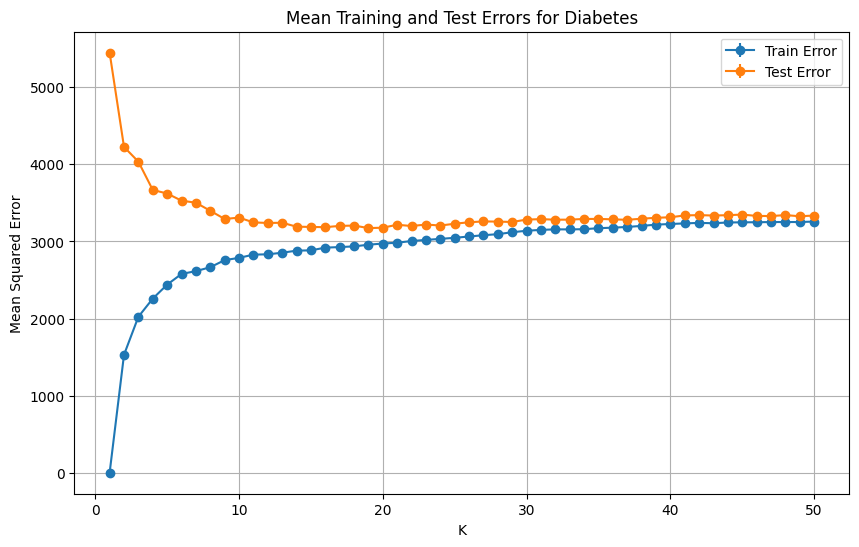

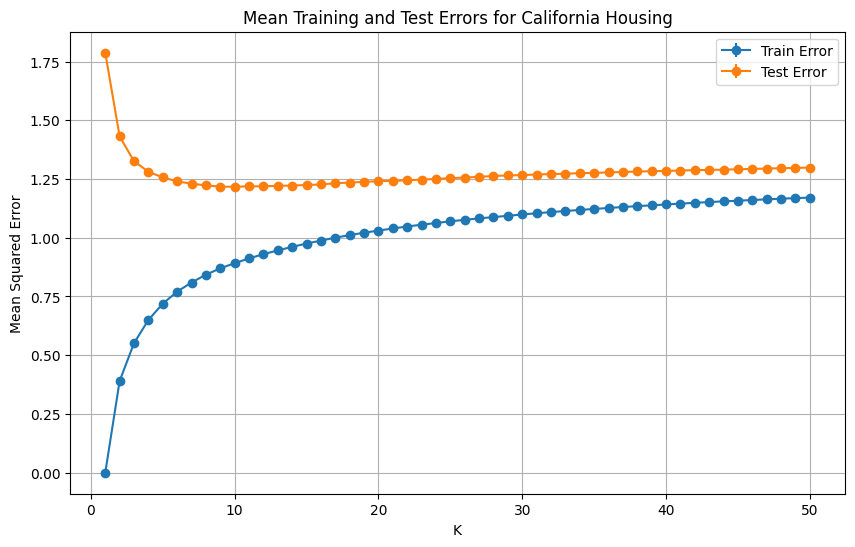


Results for L = 10:


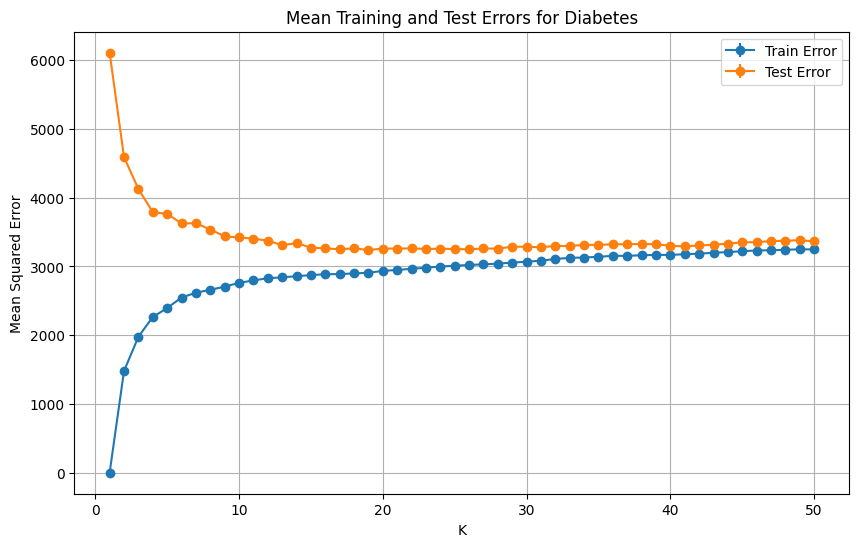

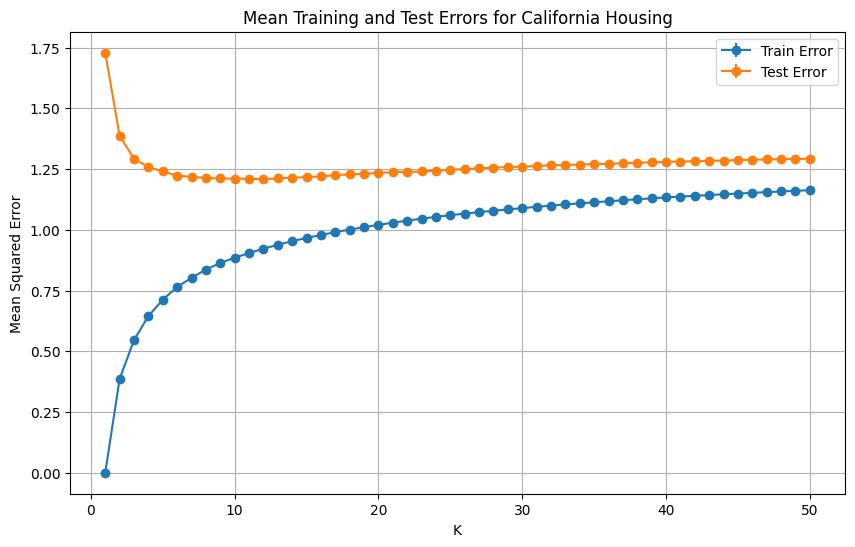


Results for L = 15:


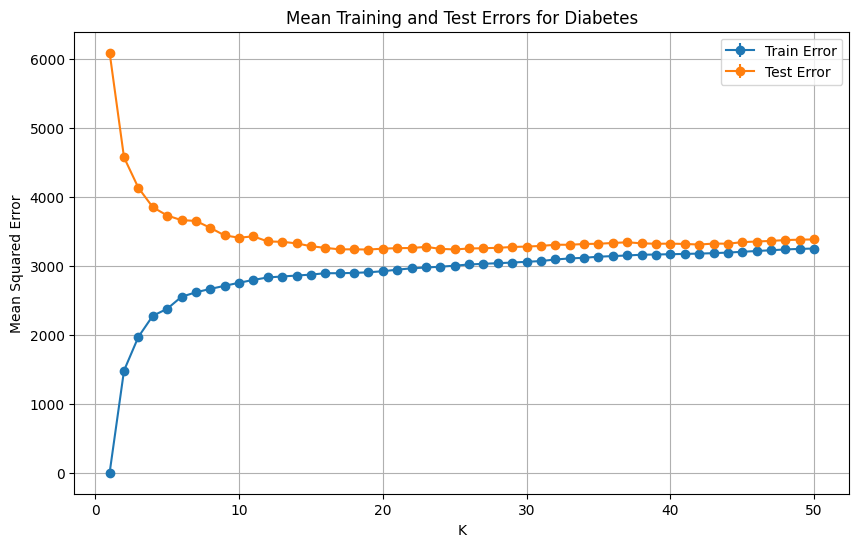

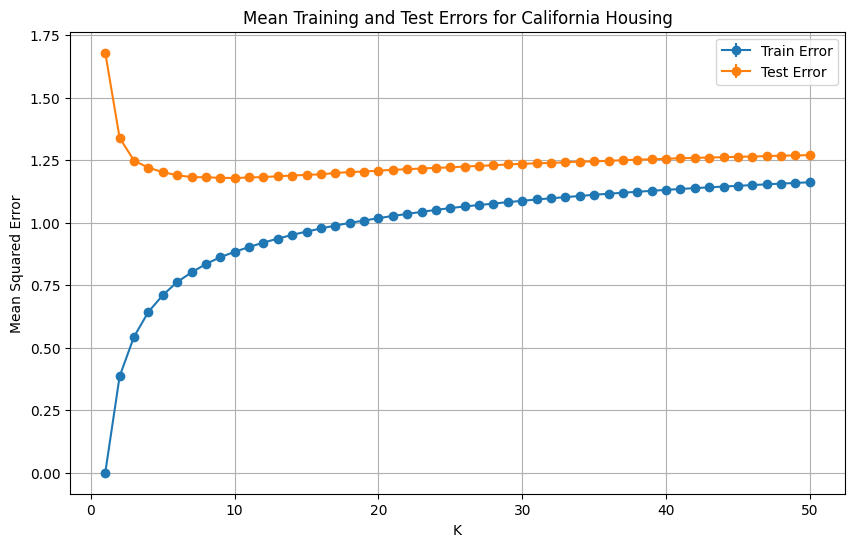

In [13]:
def calculate_ste(errors):
    return 1.96 * np.std(errors) / np.sqrt(len(errors))

def plot_errors(dataset_name, k_values, train_errors, test_errors, train_sem, test_sem):
    plt.figure(figsize=(10, 6))
    plt.errorbar(k_values, train_errors, yerr=train_sem, label='Train Error', marker='o')
    plt.errorbar(k_values, test_errors, yerr=test_sem, label='Test Error', marker='o')
    plt.xlabel('K')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Mean Training and Test Errors for {dataset_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define a range of L values for cross-validation
L_values = [5, 10, 15]

for L in L_values:
    print(f"\nResults for L = {L}:")

    # Perform experiment on Diabetes dataset
    diabetes_results = perform_experiment(diabetes_data.data, diabetes_data.target, max_k=50, n_splits=L)

    # Extract K values and corresponding errors
    k_values_diabetes = [result['k'] for result in diabetes_results]
    avg_train_errors_diabetes = [result['avg_train_error'] for result in diabetes_results]
    avg_test_errors_diabetes = [result['avg_test_error'] for result in diabetes_results]

    # Calculate standard error of the mean (SEM)
    train_sem_diabetes = [calculate_ste([result['avg_train_error'] for result in diabetes_results if result['k'] == k]) for k in k_values_diabetes]
    test_sem_diabetes = [calculate_ste([result['avg_test_error'] for result in diabetes_results if result['k'] == k]) for k in k_values_diabetes]

    # Plot errors for Diabetes dataset
    plot_errors("Diabetes", k_values_diabetes, avg_train_errors_diabetes, avg_test_errors_diabetes, train_sem_diabetes, test_sem_diabetes)

    # Perform experiment on California Housing dataset
    california_results = perform_experiment(california_data.data, california_data.target, max_k=50, n_splits=L)

    # Extract K values and corresponding errors
    k_values_california = [result['k'] for result in california_results]
    avg_train_errors_california = [result['avg_train_error'] for result in california_results]
    avg_test_errors_california = [result['avg_test_error'] for result in california_results]

    # Calculate standard error of the mean (SEM)
    train_sem_california = [calculate_ste([result['avg_train_error'] for result in california_results if result['k'] == k]) for k in k_values_california]
    test_sem_california = [calculate_ste([result['avg_test_error'] for result in california_results if result['k'] == k]) for k in k_values_california]

    # Plot errors for California Housing dataset
    plot_errors("California Housing", k_values_california, avg_train_errors_california, avg_test_errors_california, train_sem_california, test_sem_california)

##Question 3 [Automatic Model Selection]

1. Implement a version of the KNN regressor that automatically chooses an appropriate value of K from a list of options by performing an internal cross-validation on the training set at fitting time. As usually, use the scikit-learn paradigm, i.e., use the following template.

          from sklearn.base import BaseEstimator
          class KnnRegressorCV(BaseEstimator):
          def __init__(self, ks=list(range(1, 21)), cv=LFold(5)):
            # YOUR CODE HERE
          def fit(self, x, y):
            # YOUR CODE HERE
            self.k_ = # YOUR CODE HERE
            return self
          def predict(self, x):
            # YOUR CODE HERE

Figure 1: Illustration of data use for Question 3.II with a simple train/test split (and the “inner” cross validation performed on the training data by KnnRegressorCV). A better test would replace the training/test split with an additional “outer” cross validation to check multiple times what K has been selected. This scheme would be called a nested cross validation. See https://scikit-learn.org/stable/modules/cross_validation.html.

Hint: You might want to store the optimal value for K that has been determined by the internal cross-validation (as indicated in template) for ease of access in the next step. Also you can again use inheritance from BaseEstimator to allow usage of cross validate in the next step.

In [14]:
class KnnRegressorCV(BaseEstimator):
    def __init__(self, ks=list(range(1, 21)), cv=LFold(5)):
        self.ks = ks
        self.cv = cv
        self.k_ = None  # Will store the selected k value

    def fit(self, X, y):
        best_k = None
        best_avg_error = float('inf')

        for k in self.ks:
            total_error = 0

            for train_idx, val_idx in self.cv.split(X):
                X_train, X_val = X[train_idx], X[val_idx]
                y_train, y_val = y[train_idx], y[val_idx]

                knn_regressor = KnnRegressor(n_neighbors=k)
                knn_regressor.fit(X_train, y_train)
                val_preds = knn_regressor.predict(X_val)
                total_error += mean_squared_error(y_val, val_preds)

            avg_error = total_error / self.cv.get_n_splits()

            if avg_error < best_avg_error:
                best_avg_error = avg_error
                best_k = k

        self.k_ = best_k
        return self

    def predict(self, X):
        knn_regressor = KnnRegressor(n_neighbors=self.k_)
        knn_regressor.fit(X, y)
        return knn_regressor.predict(X)

2. For both datasets from the previous questions, test your KNN regressor with internal CV by using either an outer single train/test-split or, ideally, with an outer cross-validation (resulting in a so-called nested cross-validation scheme). See Fig. 1 for a further explanations. Report on the (mean) k value that is chosen by the KNN regressor with internal cross-validation and whether it corresponds to the best k-value with respect to the outer test sets. Comment on what factors determine whether the internal cross-validation procedure is successful in approximately selecting the best model

In [15]:
# Test KNN Regressor with Internal CV on Diabetes dataset
knn_regressor_diabetes = KnnRegressorCV(ks=list(range(1, 21)), cv=LFold(5))
knn_regressor_diabetes.fit(diabetes_X_train, diabetes_y_train)

print(f"Best K for Diabetes Dataset: {knn_regressor_diabetes.k_}")

# Test KNN Regressor with Internal CV on California Housing dataset
knn_regressor_california = KnnRegressorCV(ks=list(range(1, 21)), cv=LFold(5))
knn_regressor_california.fit(california_X_train, california_y_train)

print(f"Best K for California Housing Dataset: {knn_regressor_california.k_}")

Best K for Diabetes Dataset: 18
Best K for California Housing Dataset: 9
